# Advanced Mechanics 08: Technically Spinning

## Gabriel M Steward

### March 2023

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

[Problem 1](#P1) (Lots of Trajectories)

[Problem 2](#P2) (Bicycle Wheel)

[Problem 3](#P3) (Precission of the Top)

<a id='P1'></a>

# Problem 1 \[Back to [top](#toc)\]
$$\label{P1}$$

(pg 193)

*Write and demonstrate a program that reproduces diagrams like figure 2.3 (section 2.8.2). Can you find trajectories that are asymptotic to the unstable relative equilibrium on the intermediate principal axis?*

*Dr Barnes: I wrote the visualizer for you in Lecture 4.5, though please do try your hand at writing your own or modifying mine to improve the looks as you like (see the `scheme` directory). For this problem, then, I want you to change the intermediate moment of inertia B to either be closer to A (like 1.1 or 1.05 maybe) or closer to C (1.85 perhaps). Let me know which one you chose, and then use those values to generate a new trajectories figure like Figure 2.3*

*Remember to ensure that all of your trajectories have the same energy! Otherwisxe you're comparing apples to death stars and nothing will make any sense.*

*Finally, answer the quesiton posed in the problem: can you find trajectories that are asymtotic to the unstable relative equilibrium on the intermediate principal axis? (I care because these represent Dzhabenikov trajectories)*

Notably since the program given on the course site has B already at 1.1, we changed it to 1.85. 

The goal here is, with these moments of inertia, find a bunch of initial conditions (with the same energy!) that will fill out the space with various curves. The trick, though, is finding out what the condition energies are. We originally thought we could maybe find an expression to determine this, but that would take *time*, so we opted to just do it by repeated checking. 

The energy we chose to seek was 0.01, since `(define state0 (up 0.0 (up 2. 0.0 0.0) (up +0.0 +0.0 +0.1)))` has almost exactly that energy. We decided we wanted to look at the following points: three where only one component was active, three where two components were active and equal, three where two were active and unequal, one with all three the same, and one with all three different, for a total of 11 trajectories. 

After much adjusting and experimenting, we determined the following had close enough energies. 

```
(up +0.142 +0.0 +0.0) 1.0081999999999999e-2
(up +0.0 +0.104 +0.0) 1.0145282147377716e-2
(up +0.0 +0.0 +0.1) 1.0000000000000002e-2 
(up +0.084 +0.084 +0.0) 1.0146445897919491e-2
(up +0.082 +0.0 +0.082) 1.0086000000000001e-2
(up +0.0 +0.096 +0.096) 1.0190082273392609e-2
(up +0.099 +0.074 +0.0) 1.0036924282455659e-2 
(up +0.099 +0.0 +0.072) .0100845
(up +0.0 +0.106 +0.082) 1.0028940653813595e-2 
(up +0.079 +0.079 +0.079) .0100211405673007 
(up +0.086 -0.061 +0.034) .0070431781251289e-2
```

Now all that remains is to actually find a way to plot all these. 

In order to fill out the graph we also swapped signs for all these trajectories, so the final graph will have 22 trajectories and have nice symmetry.

The result...

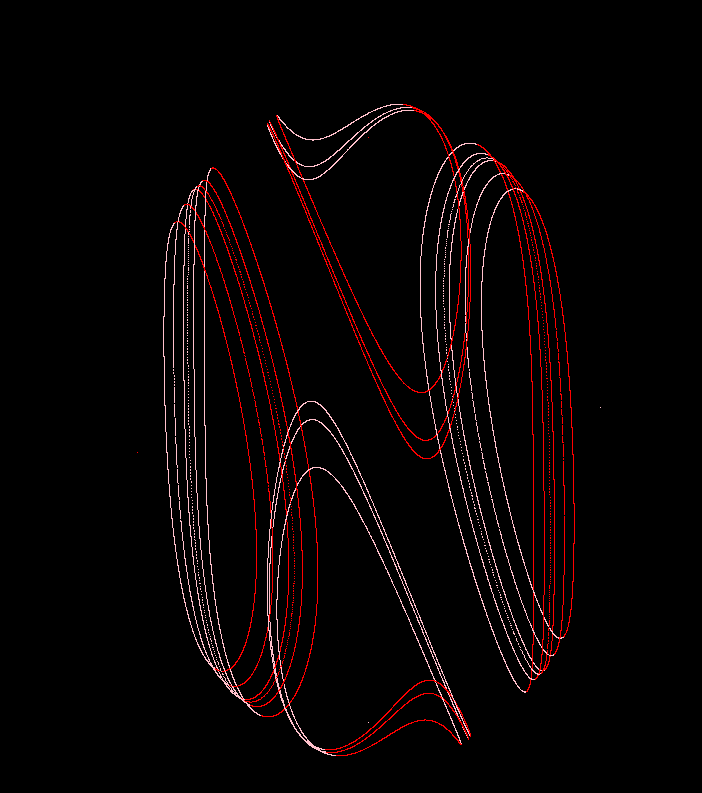

While we have some funky lines here, we somehow managed to completely miss any paths that would go through the middle in the weird figure 8 crossing pattern, which are the onees we actually wanted most. Alas, it was not to be. 

<a id='P2'></a>

# Problem 2 \[Back to [top](#toc)\]
$$\label{P2}$$

(pg 156)

*a) Imagine that you are holding a bicycle wheel by the axle (in both hands) and the wheel is spinning so that the top edge is going away from your face. If you torque the wheel by pushing down with your right hand and pulling up with your left hand the wheel will precess. Which way does it try to turn?*

Okay let's draw a picture for this one.

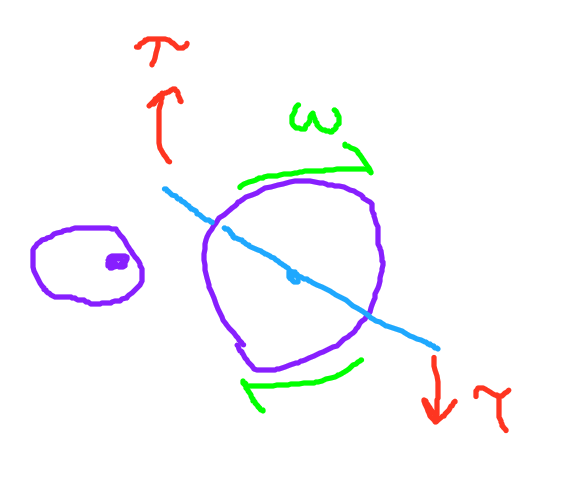

Looking at it this way, if we consider the direction we are facing to be x, then the angular momentum is pointing in the y direction, and the torque is acting in the x direction. (Nothing is acting around the z axis, sad).

In order to be careful about this, we should figure out where our principal axes are. Since the bycicle wheel is a symmetric object it's clear they'll be in line with x,y,and z, but the question is which is which for A, B, and C. 

The y axis holds the greatest moment of inertia, C, while x and z are identical, so let them be A and B. (It doesn't matter which is which.)

From here we can examine the equaitons that relate changes in angular velocity to torques::

$$ T_a = AD\omega^a - (B-C)\omega^b \omega^c $$
$$ T_b = BD\omega^b - (C-A)\omega^c \omega^a $$
$$ T_c = CD\omega^c - (A-B)\omega^a \omega^b $$

Now, our torque is acting around x, which we are correlating with A. thus, the equations simplify...

$$ T_x = AD\omega^x - (B-C)\omega^z \omega^y $$
$$ 0 = BD\omega^z - (C-A)\omega^y \omega^x $$
$$ 0 = CD\omega^y - (A-B)\omega^x \omega^z $$ 

In the *initial* state, there is only angular velocity in the y direction, so all the non-derivative terms go to zero.

$$ T_x = AD\omega^x  $$
$$ 0 = BD\omega^z $$
$$ 0 = CD\omega^y $$ 

Which is to say, initially, only the x-direction angular velocity will change. However, the moment we start doing that, our x-direction is no longer zero, and suddenly another component comes into play.

$$ T_x = AD\omega^x  $$
$$ 0 = BD\omega^z - (C-A)\omega^y \omega^x $$
$$ 0 = CD\omega^y $$ 

This means that by attemting to rotate the object spinning in y along x, we actually spin up z! But which direciton is z in? Well, C>A, $D\omega_z$ has to be positive to cancel it out. Thus we start dramatically increasing $\omega_z$ in the $\hat z$ direction, despite as we mentioned at first, no components were spinning aroudn z at all! 

Technically speaking $\omega_x$ is still increasing too, but since $\omega_y$ starts out spinning presumably much faster, the force that pulls the bycicle to spin in $\omega_z$ is quite a bit stronger than the effect in $\omega_x$. (Unless we had a true monster of a toruqe that spent almost no time "warming up" to apply itself, but that might just break the tire.)

*b) A free bicycle wheel rolls on a horizontal surface. If it starts to tilt, the torque from gravity will cause the wheel to turn. Which way will it turn? The reasoning that applies to part a) does not directly apply to the rolling bicycle wheel, which is not a holonomic system. However, it is interesting to think about whether the behavior of the two systems is related.*

This is going to be a somewhat awkward situation to imagine, since the bycicle wheel requires friction with the ground to keep moving, but we will be modeling without considering the force of friction directly. The direction determined at the end should be the same, though. 

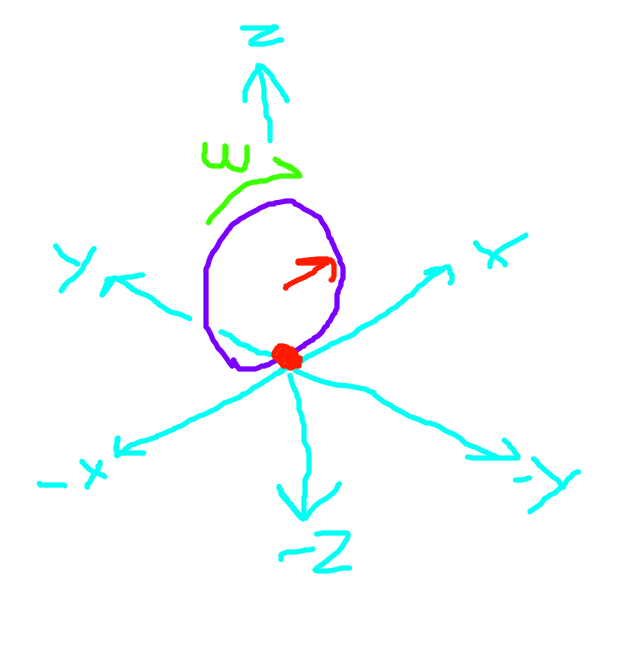

Regardless, let us forget the fact that the wheel is moving and consider it to just be spinning. Call the direction it is spinning about y, to match up with the direciton of the previous problem, and have it correspond to the moment of inertia C. -z is the direction of gravity, and x is the other direction. The moments of inertia in z and x are A and B, and it really doesn't matter which is which, but in keeping with the last problem x=A and z=B. 

Gravity acts on the center of mass of the wheel. This by itself provides no torque--rather, it is the normal force of the ground on the bottom of the wheel that provides the torque. However, while one may think that the torque is going to be in the same direction we would think of if gravity was doing the torque alone, this is actually not the case. In the moment of tilting of the ground, gravity is still acting directly downward, not providing any torque, and the normal force opposes it. However, normal forces always point *normal* to the gorund, which means there is going to be a *pulling* torque in the direction of tilt!

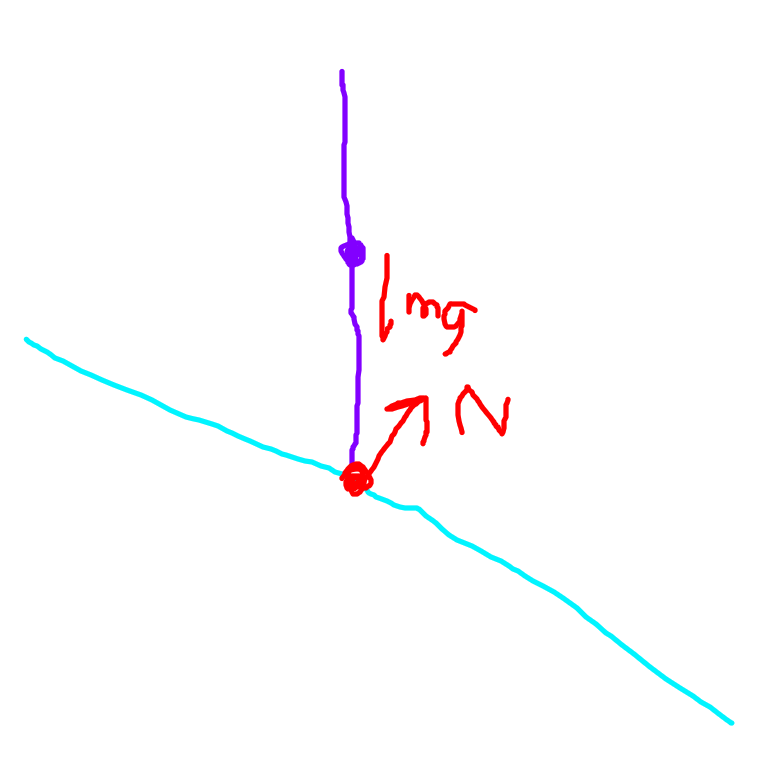

As we can see in this image, the wheel is upright, gravity provides no torque, but the normal force will. The exact magnitude of the effect is irrelevant, we currently only care about the direction. In the above image this is going to be negative around the x direction. Now, let us turn to our equations we outliend in the last part...

$$ T_x = AD\omega^x  $$
$$ 0 = BD\omega^z - (C-A)\omega^y \omega^x $$
$$ 0 = CD\omega^y $$  

As we just discussed, in the above drawing the torque will be negative, which means that $\omega_z$ is also negative as a result. This means the wheel will turn to the right, that is, in the direction the normal force is acting (the component that isn't counteracting gravity.) Even after the wheel starts to tilt over due to this, it is still mostly upright and the normal force's torque overrules that of gravity, so the turning continues in the same way. 

If the ground tilts right, the torque spins the wheel in -x. If the ground tilts left, the torque spins in x. This *reverses* the direvction of turning, reavling that right-leaning ground gives -x torque which results in -z rotation, which correlates to a turn to the *right*. Vice versa for left. 

Because we sense our words are confusing, here is a picture.

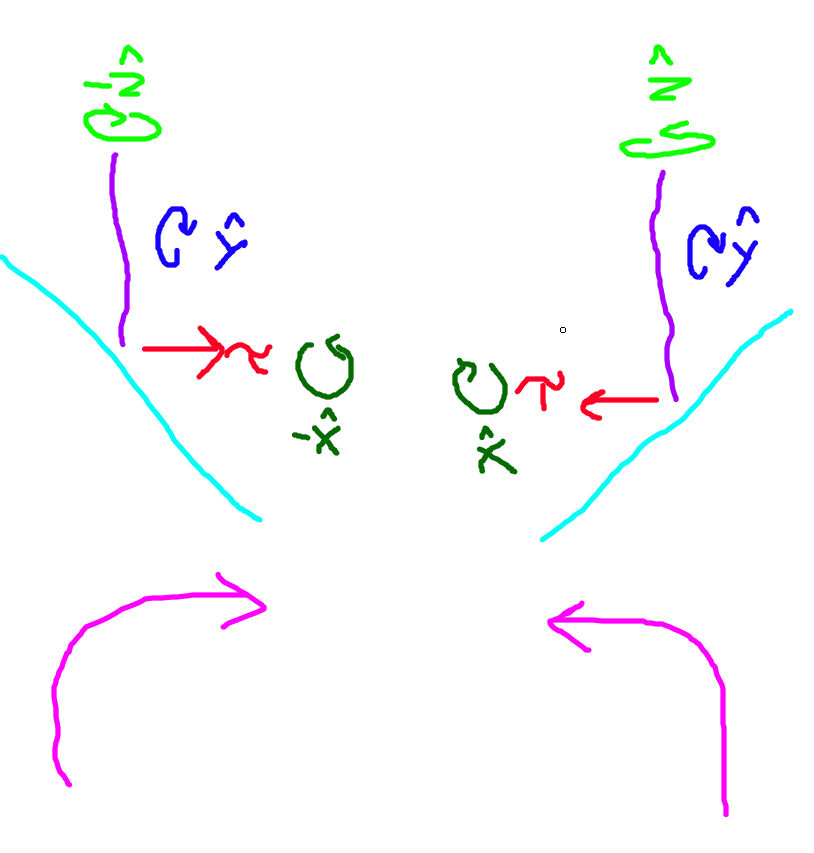

The actual *turning* of the wheel takes place because a rotation in the z direction changes which direction is *forward* for the wheel. 

<a id='P3'></a>

# Problem 3 \[Back to [top](#toc)\]
$$\label{P3}$$

(pg 164)

*Consider a top that is rotating so that $\theta$ is constant*

*a) Using conservation of angular momentum, compute  the rate of precession $\dot\varphi$ as a function of the conserved angular momenta and the equilibrium value of $\theta$.*



For all tops, C is the direction out of the top, and A and B are the same, but perpendicular to C. We have the physical picture in mind, now let's consider what we have. Also we are explicitly told that $\theta$ is constant, even if some parts of the problem seem to imply otherwise, this is stated so directly we shall continue to assume it. 

We originally solved this using torque as the change in angular momentum and then realized part d) asked for that explicitly, so clearly we have to solve it differently this way.

Let's consider angular momentum. We actually have two to consider: $p_\varphi$ and $p_\psi$, which is the angular momentum due to the precession and the angular momentum due to spinning about the C axis. We can get the momenta from the notes:

$$ p_\varphi = (Asin^2\theta + Ccos^2\theta)\dot\varphi + C\dot\varphi cos\theta $$
$$ p_\psi = C(\dot\psi + \dot\varphi cos\theta) $$

Now, there is one variable in here we do not want to use, $\dot\psi$. Fortunately, we can remove it by sovling for it!

$$ C\dot\psi = p_\psi - C\dot\varphi cos\theta $$

And so...

$$ p_\varphi = (Asin^2\theta + Ccos^2\theta)\dot\varphi + ( p_\psi - C\dot\varphi cos\theta ) cos\theta $$

Which can rather eaisly be solved for what we want.

$$ \dot\varphi = \frac{p_\varphi - p_\psi cos\theta}{Asin^2\theta} $$

One thing that will be important for later parts, if $p_\psi >> p_\varphi$, then this quantity is going to be negative.  

*b) For $\theta$ to be at an equilibrium the acceleration $D^2\theta$ must be zero. Use the Lagrange equation for $\theta$ to find the rate of precession $\dot\varphi$ at the equilibrium in terms of the equilibrium $\theta$ and $\dot\psi$.*

So the full Lagrantian is T-U, from equations 2.86 and 2.87

$$ \frac12 A (\dot\theta^2 + \dot\varphi^2sin^2\theta) + \frac12C(\dot \psi + \dot\varphi cos\theta)^2 - MgRcos\theta $$.

We are asked specifically to use the Lagrange Equation for $\theta$, so we don't need to do it for every variable. 

$$ D(\partial_2 \mathcal L) - \partial_1 \mathcal L = 0 $$

$$ \Rightarrow D(A\dot\theta) - A\dot\varphi^2cos\theta sin\theta + C(\dot\psi + \dot\varphi cos\theta)\dot\varphi sin\theta - MgRsin\theta = 0$$
$$ \Rightarrow A\ddot\theta - A\dot\varphi^2cos\theta sin\theta + C(\dot\psi + \dot\varphi cos\theta)\dot\varphi sin\theta - MgRsin\theta = 0$$

Now that we've done this, we can apply our simplifications. Since we know $\theta$ is constant, we can cut the acceleration.

$$ \Rightarrow - A\dot\varphi^2cos\theta sin\theta + C(\dot\psi + \dot\varphi cos\theta)\dot\varphi sin\theta - MgRsin\theta = 0$$

Our goal, $\dot \varphi$, appears multiple times, and not always in its squared formulation, so we'll need to change this into quadratic euqtion form.

$$ \left( -A cos\theta sin\theta + C cos\theta sin\theta \right)\dot\varphi^2 + \left( C \dot\psi sin\theta \right)\dot\varphi + \left( -MgRsin\theta \right) = 0 $$

And so...

$$ \dot \varphi = \frac{-C\dot\psi \pm \sqrt{C^2\dot\psi^2 sin^2\theta + 8(C-A)cos\theta sin\theta MgRsin\theta}}{2(C-A)cos\theta sin\theta} $$

*c) Find an approximate expression for the precession rate in the limit that $\dot \psi$ is large*

So, $\dot\psi$ is large. What does that do to our precession rate? First of all the $\dot \psi$ term now dominates the square root, so we get...



$$ \rightarrow \dot \varphi \approx \frac{-C\dot\psi \pm C\dot\psi sin\theta}{2(C-A)cos\theta sin\theta} $$
$$ \Rightarrow \dot \varphi \approx \frac{C\dot\psi(\pm sin\theta - 1)}{2(C-A)cos\theta sin\theta} $$

$$ \Rightarrow \dot \varphi \approx \frac{C\dot\psi(\pm 1 - sec\theta)}{2(C-A)cos\theta} $$

It's easier to see it in the previous step, but this result is always negative. 

*d) The Newtonian rule is that the rate of change of the angular momentum is the torque. Assume the top is spinning so fast that the angular momentum is nearly the same as the angular momentum of rotation about the symmetry axis. By equating the rate of change of this vector angular momentum to the gravitaitonal torque on the center of mass develop an approximate formulae for the precession rate.*

Embarrasingly, this is how we thought we had to solve part a). Evidentially *this* is where the torque as change in angular momentum needed to be used. 

We are applying a torque based on the force of gravity, which we can consider $\vec \tau = \vec r \times \vec F = -Rmgsin\theta \hat x$. The magnitude does not change, but this is just the initial direction, we will cycle through torques from x to y as we precess around a circle. This direction will always, though, be perpendicular to the rotaitonal axis C, by geometry, so we can just write it as

$$ \vec \tau = -Rmgsin\theta \hat\varphi $$ 

As that corresponds to a counterclockwise (positive $\varphi$) push. 

So, we have torque. Since $\theta$ is constant, it's fixed. Physically, torque is the change in angular momentum, and since we are acting perpendicular to C we cannot change the angular momentum *in* C, so we have to add it elsewhere. Naturally, it will happen about A and B as the top precesses around its axis.

The real quesiton, though, is what exactly is the effect of this? Well, we know torque is change in angular momentum, so...

$$ -Rmgsin\theta \hat\varphi = d \vec L/dt $$

Now, what is L? Well, since our angle is fixed, it's always this:

$$ \vec L = C \omega \hat c $$

Where $\hat c$ is just the direction we happen to be pointing. In spherical it's just the radial direction, in cartesian it's a fixed amount in $\hat z$ and some other amount in x and y.

Correlating everything, we can get

$$ -Rmgsin\theta \hat\varphi = C \omega \hat c'$$
$$ \Rightarrow -\frac{Rmgsin\theta}{C\omega} \hat\varphi = \hat c'$$

Which means that the overall direction is changing over time around $\phi$. Since $\theta$ is a constant, the rate at which this occurs is also a constant. In fact since we are only changing in this one direction, we can remove the vector nature of the relation entirely.

$$ \Rightarrow -\frac{Rmgsin\theta}{C\omega} = \dot \varphi$$

The question asks us to state this in terms of the conserved angular momenta. This would just be the magnitude of $\vec L$, $C\omega = L$. 

$$ \Rightarrow -\frac{Rmgsin\theta}{L} = \dot \varphi$$

Which is negative, like both the others.

*e) Numerically integrate the top to check your deducitons.*

Okay so the code is provided, let's see exactly what it does. Since we're just validating what we did above we don't really think there's much purpose in trying to alter the code to see what happens, but maybe we'll think of something.

The first thing it spits out is this:

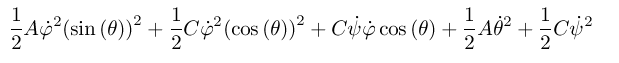

Which is just the Kinetic Energy, which we got from the textbook as Equation 2.86 back in part b). Then it gives us the potential energy, which we also got from teh textbook already.

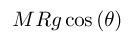

And the Lagrangian, which was where we started in part b) since we figured T and U were already known.

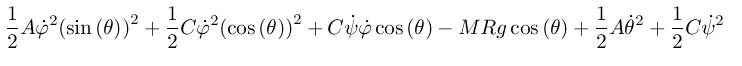

The program gives us all three Lagrange Equations. We, however, only needed $\theta$.

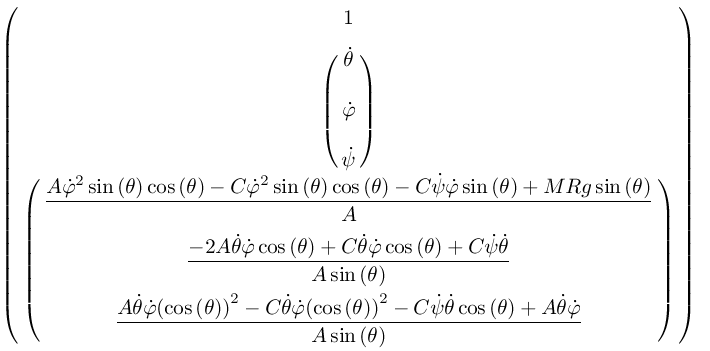

The top of the vector is what we wer elooking at, and it is in fact the same, just arranged differently than how we stated it. 

At this point we proceed to start a very slow evolution of the system with red green and blue lines. But what do these represent? Well, from the shape alone it becomes rather clear. The green line is the actual angle $\varphi$ as time progresses, the blue one is the rate of rotation $\dot\psi$, and the red one is the tilt angle $\theta$. Notably all three of them are changing so the code is evolving a physically real system, *not* the system we were working with before, where $\theta$ was held constant. 

(It occurs to us that the colors don't exist on a printout... the one that's steadily rising with minor oscillations is green, $\varphi$. The red one is at the bottom oscillating steadily and is $\theta$. The blue one has humps and is $\dot\psi$. 

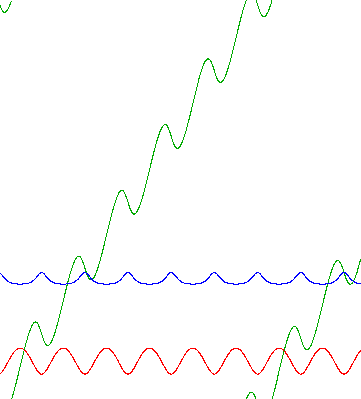

This doesn't really appear to be confirming much of anything, it's just showing the evolution of a top. Which we already knew about from both the lecture and the graphs on pages 162-163. Unsure of what we're supposed to learn here, or mess with. 

It does appear that we're actually plotting $\theta$ rather than $\pi-\theta$, as in the book. 

We will point out that our tops have $\theta$ fixed, while this does not--$\theta$ slightly oscillates, as can be seen from the line oscillating on teh bottom. If we held it fixed, naturally the oscillations in the other terms would die out. However, $\varphi$ still has a gradually moving slope to it separate from thsoe oscillations, indicating a steady change in position, but no acceleration. Our results appear to be going negative, but we could always have the initial spinning change directions and go the other way. In fact... perhaps we could actually evaluate that. What if we tried spinning the other way?

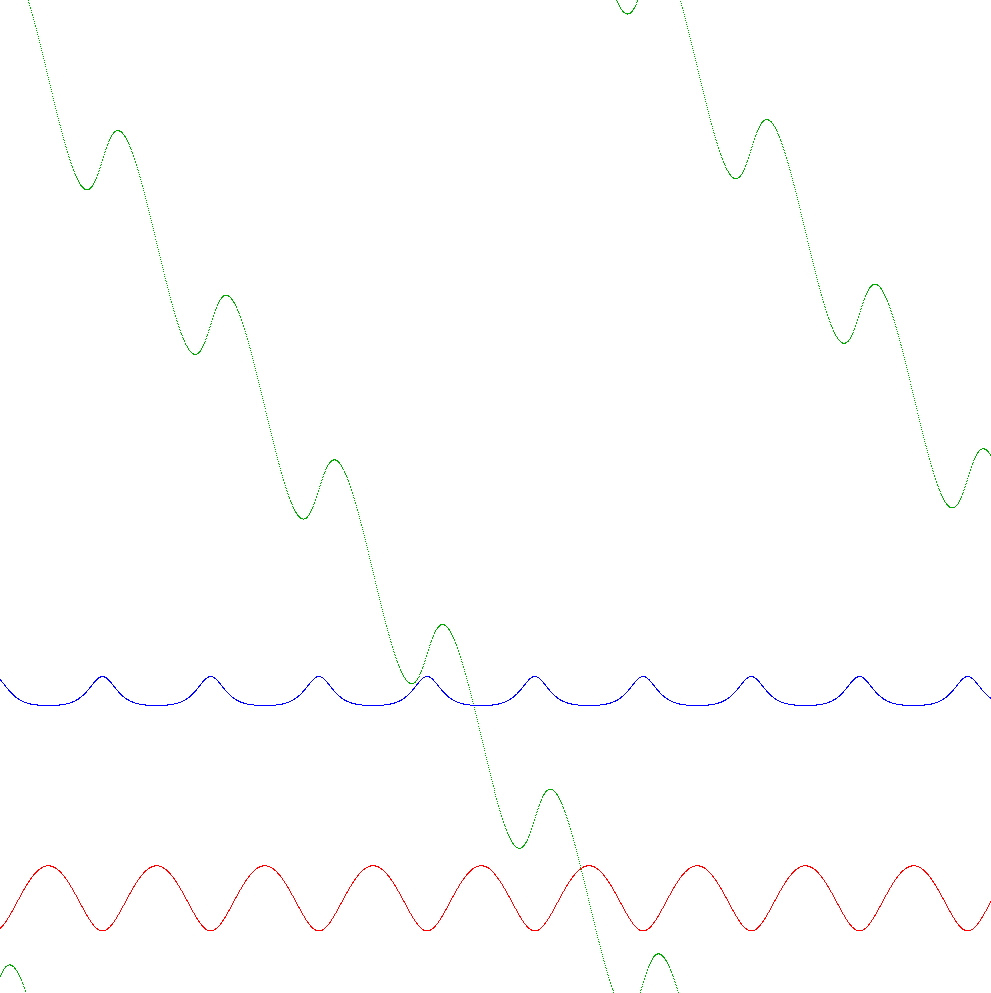

Would you look at that, virtually identical, but with downward slope. (There is a mild deception in this graph, and it is that it is plotting $\dot\varphi * (-1)$, so all of them can show up on the same graph. It *is* going backward).

See? We did find something to mess with! No idea why it genreated so much larger this time, though.

Still somewhat confused how this relates to the constant-$\theta$ results we were working on before. 